# Data Science blog S01: Introduction to Linear Regression

In [46]:
from IPython.display import HTML
%config InlineBackend.figure_format = 'svg'

In [5]:
%%html
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The Python code is hidden for easy reading. To view it click <a href="javascript:code_toggle()">here</a>

The purpose of this initiative is to raise awareness on how data science practices leverage data to solve real life problems. The tutorials will keep the programming part to the minimum required level. Those tutorials can be followed by both beginners and more experienced individuals.

## Contents

1. [What is Linear Regression?](#section1).
2. [What is Linear Regression?](#section2).
3. [What is Linear Regression?](#section3).
4. [What is Linear Regression?](#section4).

<a id='section1'></a>

### What is Linear Regression

Linear Regression is a machine learning algorithm based on [Supervised Learning](https://en.wikipedia.org/wiki/Supervised_learning). There are two important terms in the previous sentence. The first is **regression**. Regression is the task of predicting a continuous variable(price, weight, emissions) from a set of input variables. **Supervised learning** means that the algorithms are learning by example. That means that we train an alogorithm to map an input to an ouput. For example: a) A person who weights(input) 80 kgs has height(output) of 1.80 m. b) A house with 4 rooms (input) worths(output) 2M DKK. In both examples (a) and (b) we have a set of inputs (weight, # of rooms)  which is mapped to a set of outputs(height, worth of the house). The value that we want to predict (output) is called the Dependent Variable whilst the predictors (input) are called independent variable.

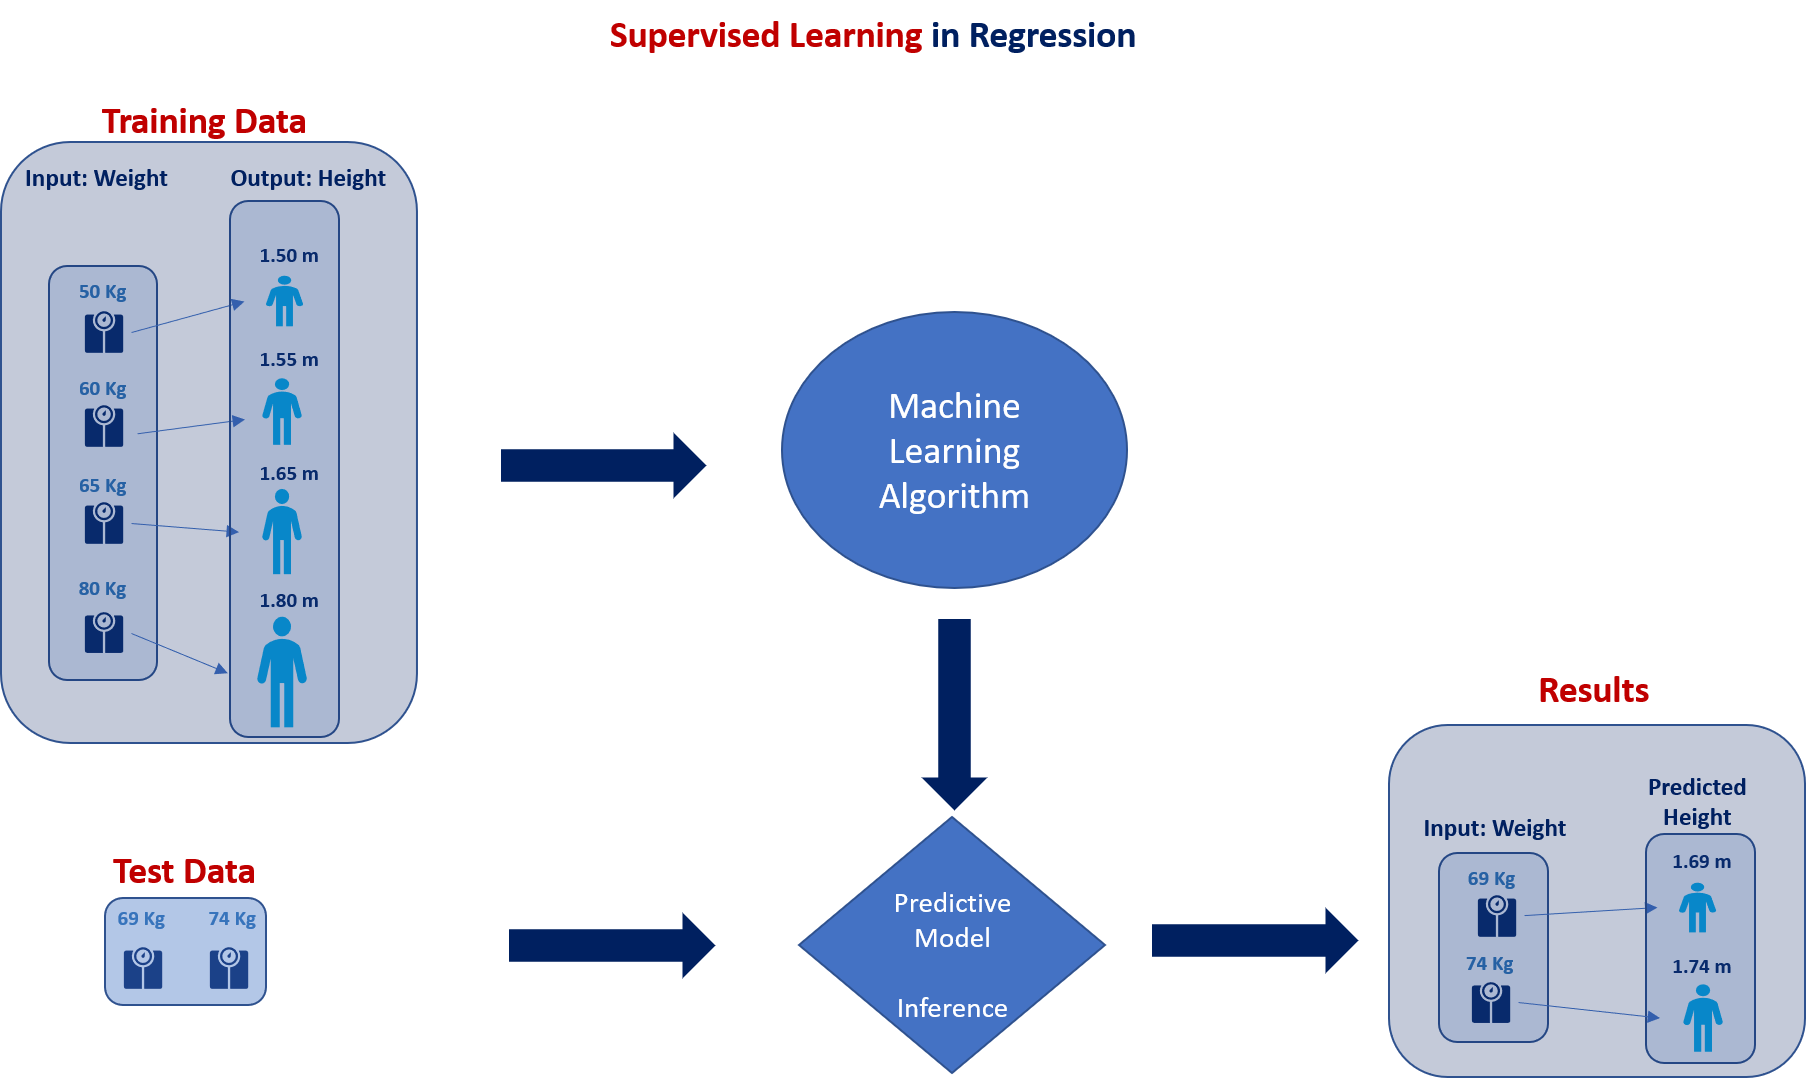

In [55]:
Image(filename='C:\\Users\\geosa\\OneDrive - ROCKWOOL Group\\Desktop\\supervised.png')

Mathematically, the simple Linear Regression assumes only one input predictor (i.e only height ) and can be described by the following equation:




\begin{equation*}
y = \beta_{1}x_{1} + \beta_{0}
\label{eq_linreg} \tag{1}
\end{equation*}

The terms in eq. \eqref{eq_linreg} are:

* $y:$ Predicted Value
* $x_{1}:$ Predictor
* $\beta_{1}:$ Coefficient that determines how a unit change in $x_{1}$ affects a unit change  in $y$. It is also called the slope of the regression line.
* $\beta_{0}:$ Is the intercept of the regression line; that is the predicted value when $x_{1} = 0$.

To build some intuition behind this equation we will put it into context. The figure below contains three lines which we built using \eqref{eq_linreg}. For all the three lines the input data $x_{1} = [0,1,2,3,4,5]$.

<ol>
<li>For the blue line, we choose $\beta_{0} = 0$ and $\beta_{1} = 1$. By replacing those values in the equation we get  $y = 1*x_{1} + 0 \rightarrow y=x_{1}$. Naturally, $y = [0,1,2,3,4,5]$ for every $x_{1} = [0,1,2,3,4,5]$   </li> <br />
    
<li>For the orange line, we choose $\beta_{0} = 4$ and $\beta_{1} = -2$. By replacing those values in the equation we get  $y = -2x_{1} + 4$. Therefore, $y = [4,2,0,-2,-4,-6]$ for every $x_{1} = [0,1,2,3,4,5]$</li> <br />

<li>Finally, For the gray line, we choose $\beta_{0} = 2$ and $\beta_{3} = -2$. By replacing those values in the equation we get  $y = 3x_{1} + 2$. Therefore, $y = [2,5,8,1,14,17]$ for every $x_{1} = [0,1,2,3,4,5]$</li>
</ol>




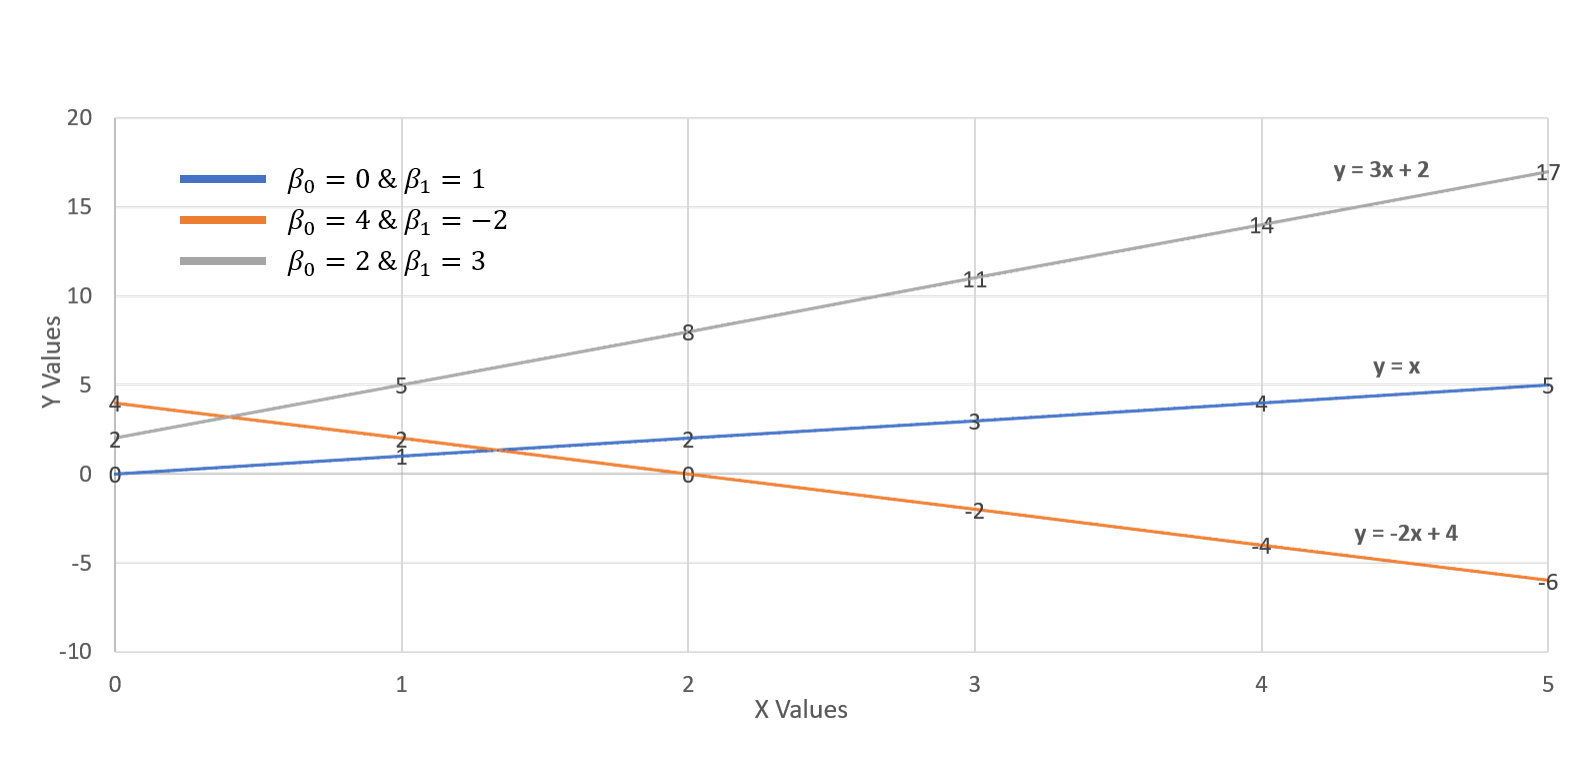

In [56]:
Image(filename='C:\\Users\\geosa\\OneDrive - ROCKWOOL Group\\Desktop\\regression.png')

We see from the figure above, that for every $x_{1} = 0$, $y$ takes the value of $\beta_{0}$. Secondly, the direction of the line depends on the sign of $\beta_{1}$. Lastly and most important, what we need to remeber from the above example is that for the same $x_{1}$ values, the direction and values of the regression line are determined by the coefficients $\beta_{0}$ & $\beta_{1}$.

### How do we measure how good the regression line is?
Let us assume that we have the pair of training data $X = [x_{1}, x_{2}, x_{3}, x_{4}, x_{5}, x_{6}, x_{7}, x_{8}]$ which maps to an output $Y = [y_{1}, y_{2}, y_{3}, y_{4}, y_{5}, y_{6}, y_{7}, y_{8}]$. For this pair of data, we need to find the regression line that best fits these data. A measure of how good the the regression line is, is the Mean Squared Error (MSE). Looking at Case 1 in the figure below we see that the regression line has a constant value of $y=4$. That is, because we chose the slope $\beta_{1} = 0$ &  $\beta_{0} = 4$. To measure the error we take the difference of the $y$ value of each point and the $y$ value of the regression line. Therefore, for the first point $y_{1}$ the error is $\epsilon_{1} = y_{1}-y$. In the same manner, the error for the rest of the points will be $\epsilon_{2},\epsilon_{3},\epsilon_{4},\epsilon_{5},\epsilon_{6},\epsilon_{7}, \epsilon_{8}$. Naturally, one would advocate that then total error of the regression will be given by $Sum_{error} = \epsilon_{1}+\epsilon_{2}+\epsilon_{3}+\epsilon_{4}+\epsilon_{5}+\epsilon_{6}+\epsilon_{7}+ \epsilon_{8}$. That does not stand true through. The individual errors can either take a positive or a negative value. For example, for $y_{3}= 3$ then $\epsilon_{3} = y_{3}-y = 3-4 = -1 $. When we sum over all the error, it is possible that we get a small values becuase of the negative values cancelling out the positive values. We deal with this issue by squaring each individual before summing. That said, the total error would be $$Sum_{error}^{2} =\epsilon_{1}^{2} +\epsilon_{2}^{2} +\epsilon_{3}^{2} +\epsilon_{4}^{2} +\epsilon_{5}^{2} +\epsilon_{6}^{2} +\epsilon_{7}^{2} + \epsilon_{8}^{2}$$ 

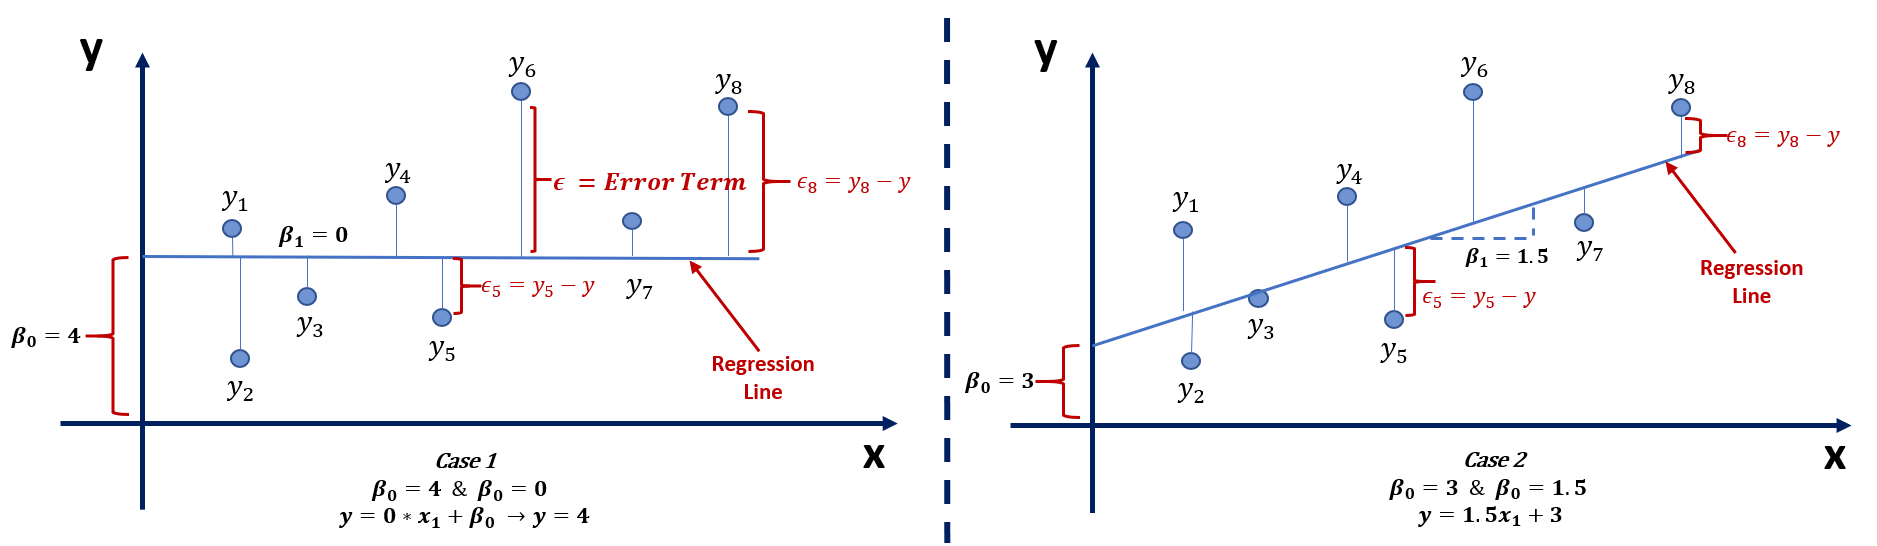

In [57]:
Image(filename='C:\\Users\\geosa\\OneDrive - ROCKWOOL Group\\Desktop\\regression_error.png')

The regression lines from the two cases above have different regression errors. Visually we see that the regression line in case 2, fits the data better than the regression line in Case 1. That means which res that we chose better $\beta_{0}$ & $\beta_{1}$ parameters for Case 2 than Case 1 which resulted in a better fit and therefore in a lower $Sum_{error}^{2}$. To put it briefly, the objective of Linear Regression is to find the $\beta_{0}$ & $\beta_{1}$ coefficients that minimizes the $Sum_{error}^{2}$ on a set of training data. 

### How do we choose the coefficients of linear regression?
In Machine Learning we choose the coefficients numerically. That means that due to computational cost, we have a computer finding those parameters for us. The way the computer finds the best parameters is through a process called [Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent#:~:text=Gradient%20descent%20is%20a%20first,the%20direction%20of%20steepest%20descent.). Since the concept can be mathemetically heavy and overwhelming, we will just build some intuition behind the process. Gradient Descent consists of two terms. Gradient, which means slope and Descent which means goes down. We look at the figure below to understand what happens on the surface of gradient descent. We mentioned earlier that the error of the linear regression depends on the parameters $\beta_{0}$  $\beta_{1}$ of the line that fits the data. For simplicity, lets us assume that the error only depends on the coefficient $\beta_{1}$ as in the figure below. The different values of $\beta_{1}$ gives differnt values of the error and thus can be viewed as the curve below. Here comes into play the gradient descent. The algorithm makes a random guess of what $\beta_{1}$ could be. That is the point p1. We see that at point p1 the slope is quite steep and has a large value. The 'Descent' part indicates that we should search for points where the slope is smaller. The the algorithm tries point p2. We calculate the slop for this point and we see that it is smaller than what it was in p1. The algorithm now know that it took the correct decision to choose a value towards that direction. Nevertheless the slope is still steep. On the third trial, the algorithm tries point p3. At this point the algorithm finds a point where the slope is almost horizontal or that it has value close to zero. We also see that at p1 where the slope is almost zero, we also have the small error. Therefore, the algorthm will pick the value of the coefficient $\beta_{1}$ at point p3 as the one that gives the smallest error. The Gradient Descent algorithm can be extended for any number of parameters. 

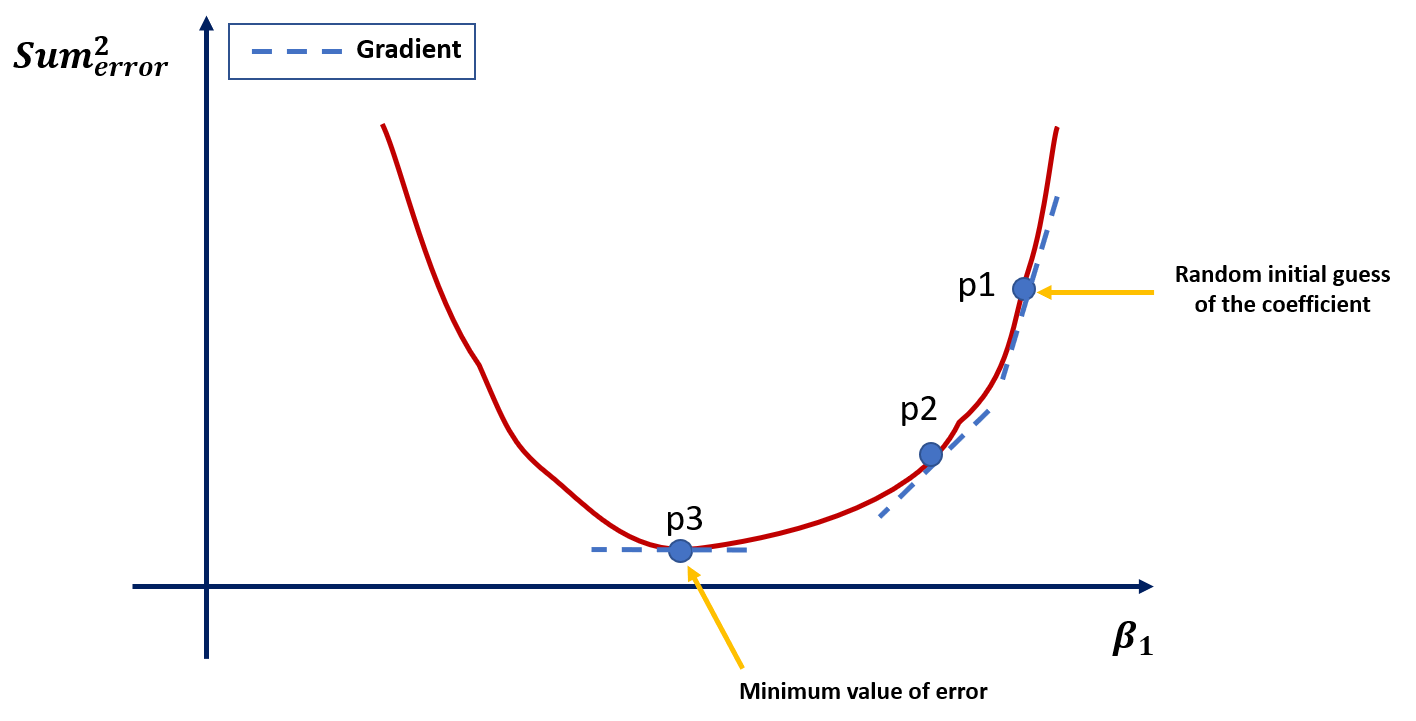

In [58]:
Image(filename='C:\\Users\\geosa\\OneDrive - ROCKWOOL Group\\Desktop\\gradient_descent.png')